# Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

# Burada veri seti işlemleri için Pandas, görselleştirme işlemleri için Matplotlib, makine öğrenimi algoritmalarını uygulamak ve sonuçlarını değerlendirmek için Sklearn kütüphanelerini import edeceğiz.

#  Data Analysis


In [ ]:
dataset = pd.read_csv("insurance.csv")
df = dataset.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().sum()
# Boş data var mı kontrol edelim.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<Axes: >

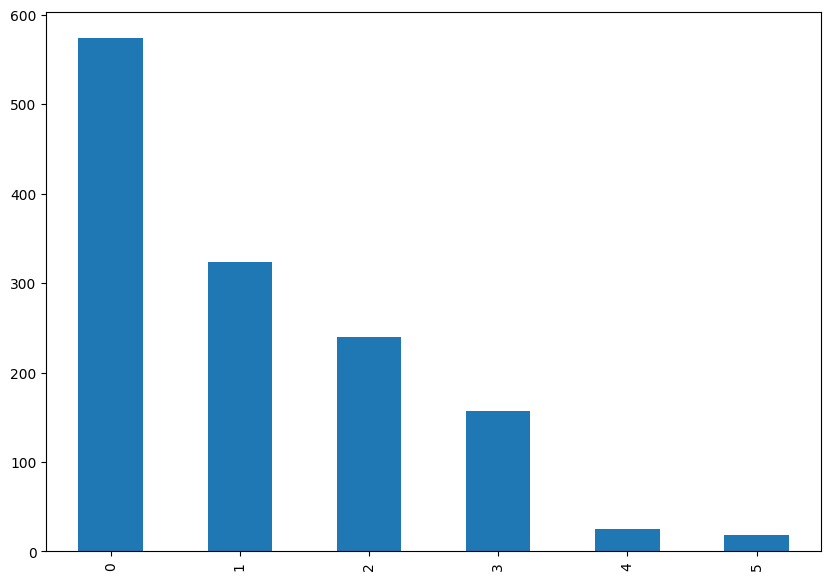

In [ ]:
plt.figure(figsize=(10,7))
df["children"].value_counts().plot.bar()
# Kaç çocuk var?

<Axes: >

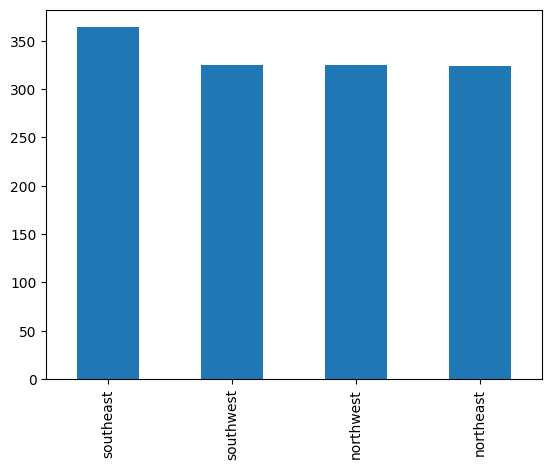

In [ ]:
df["region"].value_counts().plot.bar()


Region ve children grafiklerine baktığımızda region grafiğinin birbirlerine yakın değerlerde dağılım gösterdiğini söyleyebiliriz. Bu durumda region değerinin bir parametre olmadığını söyleyebiliriz.
Ama children grafiği için bu durum böyle değil

In [ ]:
df["sex"].value_counts()
# Toplamda kaç erkek kaç kadın var

male      676
female    662
Name: sex, dtype: int64

male      676
female    662
Name: sex, dtype: int64


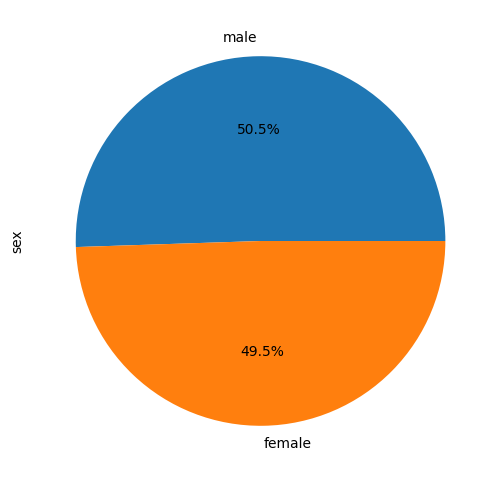

In [ ]:
print(df["sex"].value_counts())
df["sex"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(6,6));
# Kadın erkek dağılımı

no     1064
yes     274
Name: smoker, dtype: int64


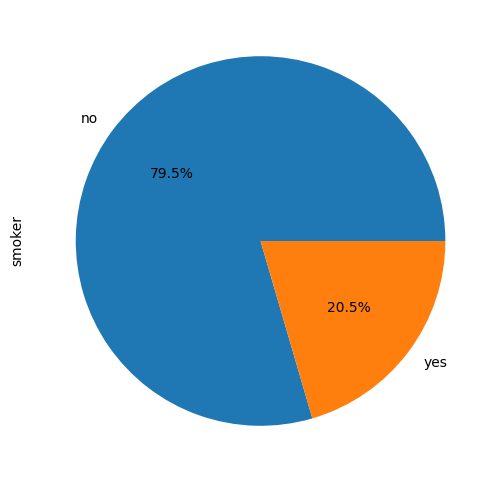

In [ ]:
print(df["smoker"].value_counts())
df["smoker"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(6,6));
# Sigara içenler içmeyenler

<Axes: xlabel='region', ylabel='bmi'>

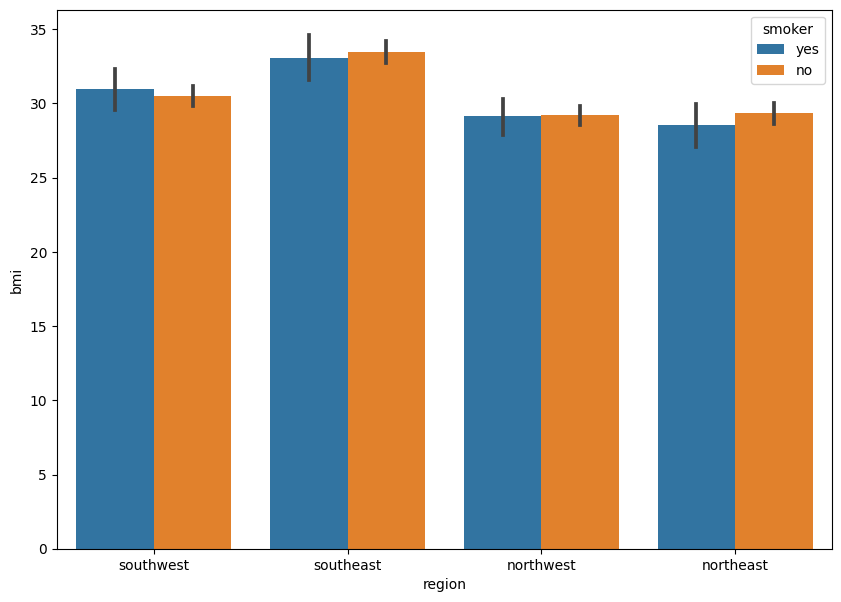

In [ ]:
plt.figure(figsize=(10,7))

sns.barplot(x="region", y="bmi", hue="smoker", data=df)

# Data Preprocessing


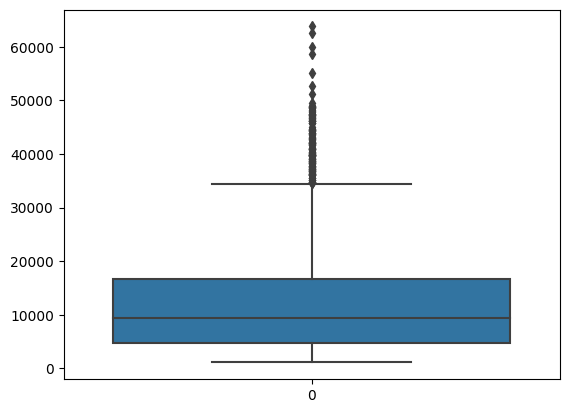

In [ ]:
# Outliers (Aykırı Değer)
sns.boxplot(df.charges);

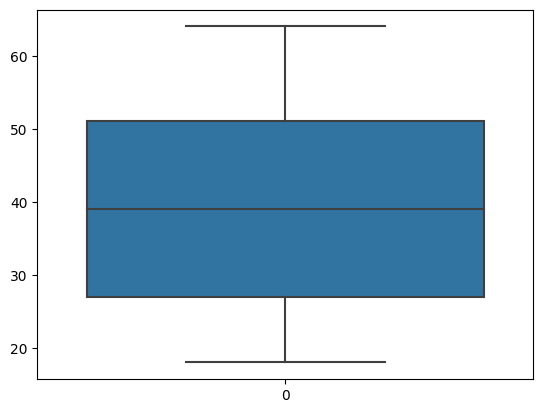

In [ ]:
sns.boxplot(df.age);

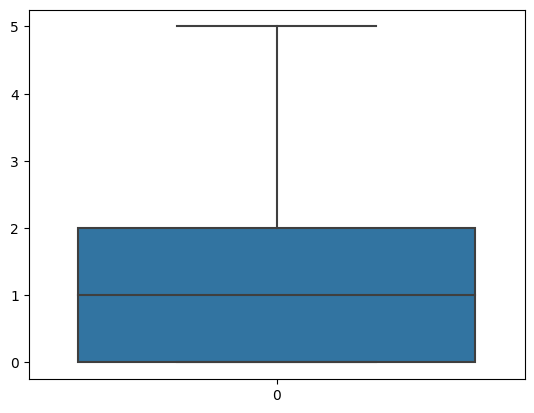

In [ ]:
sns.boxplot(df.children);

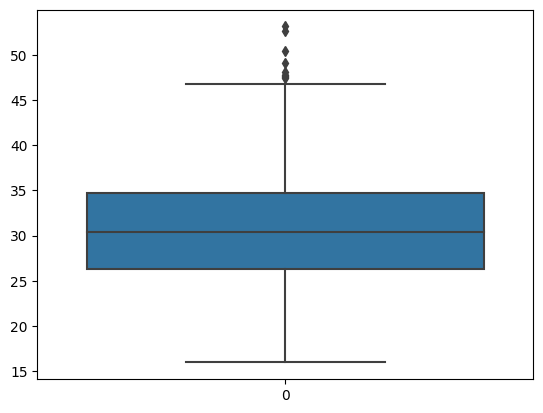

In [ ]:
sns.boxplot(df.bmi);

In [ ]:
# Label encoding
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])
# Label Encoder veriyi birebir sayısallaştırmaya yarar. Yani kategorik her veriye sayısal bir değer atar.

In [ ]:
label_encoding("smoker")
label_encoding("sex")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# One-hot encoding

one_hot = pd.get_dummies(df["region"])
one_hot.head()
# One-Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Kategorik verilerin temsilinin daha etkileyici ve kolay olmasını sağlar.

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
df = pd.concat([df, one_hot], axis=1)
df.drop("region", axis=1, inplace=True)
df.head()

# Artık bütün data nümerik data oldu.

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [ ]:
x = df.drop("charges", axis=1)
y = df["charges"]

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x[0:5]
# Tüm sayıları 0 ve 1 arasına yeniden ölçeklendirir. Değişkenler scale edilirse daha hızlı ve daha doğru sonuç alırız.

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
x_train.shape

(1070, 9)

In [ ]:
y_train.shape

(1070,)

In [ ]:
x_test.shape

(268, 9)

In [ ]:
y_test.shape

(268,)

# Model Selection

In [ ]:
P# model selection

linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
Rand_forest = RandomForestRegressor()
SVM = SVR()

In [ ]:
linreg_scores = cross_val_score(linreg,
                                x_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

7bu kod linreg (lineer regresyon modeli) kullanılarak eğitim veri seti üzerinde 10 katlı çapraz doğrulama ile modelin ortalama karesel hata (MSE) performansını değerlendirir ve her bir kat için bu hataları döndürür. Bu sayede modelinizin ne kadar iyi veya kötü performans gösterdiğini değerlendirebilir ve modelinizi daha iyi hale getirmek için gerekli iyileştirmeleri yapabiliriz.

In [ ]:
linreg_scores
# Değerler lineer regresyon olarak karşımıza çıkıyor. Cross validation yapıldıktan sonra çıkan sonuç karşımıza gelmiş oldu.
# Dizi içerisindeki her bir değer veri kümesinin belirli bir bölmesi üzerinde modelimizin tahminlerinin gerçek hedef değerlerinden ne kadar sapma gösterdiğini temsil eden bir yapıda.

array([-36875998.62836598, -43307871.90469339, -27392943.335941  ,
       -36545076.53517248, -34064321.21101744, -37545462.85261904,
       -52992268.32309429, -39706839.29685257, -38357145.09175086,
       -32042446.75311643])

In [ ]:
DecTree_scores = cross_val_score(DecTree,
                                x_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [ ]:
DecTree_scores

array([-34950885.09763014, -43063645.49118543, -47673799.16899823,
       -49045456.95027655, -51069173.01016463, -33541597.01411868,
       -52055554.31935377, -43913257.42273639, -49300482.38858685,
       -31386715.93948726])

In [ ]:
Rand_forest_scores = cross_val_score(Rand_forest,
                                x_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [ ]:
Rand_forest_scores

array([-22889063.25714552, -27166493.69924763, -15130273.95013624,
       -19941594.73918388, -27759135.4356838 , -24543632.80948614,
       -30850784.52815487, -30009236.82360733, -25915243.93317938,
       -22136006.53725249])

In [ ]:
svm_scores = cross_val_score(SVM,
                                x_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [ ]:
svm_scores

array([-1.56939674e+08, -1.55688887e+08, -1.64428208e+08, -2.10106259e+08,
       -1.69069136e+08, -1.08552023e+08, -1.51800872e+08, -1.47702857e+08,
       -1.67329025e+08, -1.50282422e+08])

In [ ]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores:{scores},
  Mean: {scores.mean()},
  Standart Deviation: {scores.std()}
  """)

score_display fonksiyonu, hiperparametre optimizasyonu sürecinde elde edilen skorları değerlendirir ve bu skorların istatistiksel özetini sağlar. Bu, modelin performansının ne kadar değişken olduğunu ve ortalama performansını hızlı bir şekilde değerlendirmek için kullanılır.








In [ ]:
score_display(linreg_scores)


  RMSE Scores:[6072.56112595 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7279.57885616 6301.33631041 6193.3145481  5660.60480453],
  Mean: 6133.124658979258,
  Standart Deviation: 517.5126188634559
  


In [ ]:
score_display(DecTree_scores)


  RMSE Scores:[5911.92735896 6562.2896531  6904.62158043 7003.24617233 7146.26986687
 5791.5107713  7214.95352164 6626.70788723 7021.43022386 5602.38484393],
  Mean: 6578.534187966443,
  Standart Deviation: 568.2821640791692
  


In [ ]:
score_display(Rand_forest_scores)


  RMSE Scores:[4784.25158799 5212.14866435 3889.76528214 4465.60127409 5268.69390226
 4954.15308701 5554.34825413 5478.06871293 5090.70171324 4704.89176679],
  Mean: 4940.262424492398,
  Standart Deviation: 477.44502139641406
  


In [ ]:
score_display(svm_scores)


  RMSE Scores:[12527.55657891 12477.53529947 12822.95627471 14495.04256846
 13002.65880912 10418.83021956 12320.74963324 12153.30642099
 12935.57208746 12258.97310757],
  Mean: 12541.318099949585,
  Standart Deviation: 951.4602172803403
  


# Hyper-parameter Optimization

Hiper parametreler, bir modelin başarıya ulaşmak için optimize edilmesi gereken özelliklerdir. Bunlar, modelin öğrenme oranı, yinelemeler sayısı, aktivasyon fonksiyonları, ağırlıklar, regulasyon parametreleri, çıkış fonksiyonu gibi özelliklerdir.

In [ ]:
params = {"n_estimators": [3, 10, 20, 50],
          "n_jobs": [2, 3, 4, 10]}

In [ ]:
grid_s = GridSearchCV(Rand_forest, params, cv=5, scoring="neg_mean_squared_error")

Bu kod, random forest modelinin en iyi hiperparametrelerini bulmak için bir optimizasyon süreci olan "grid search" yöntemini kullanır. Grid search, farklı hiperparametre değerlerini deneyerek modelin performansını 5 farklı veri bölümünde (5 katlı çapraz doğrulama) değerlendirir. Modelin performansı, negatif ortalama kare hatası (negatif MSE) metriği üzerinden değerlendirilir. Bu sayede, en iyi performansı veren hiperparametre kombinasyonu bulunmaya çalışılır.;


In [ ]:
grid_s.fit(x_train, y_train)
# En iyi performansı sağlayan seti belirler.

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Bu parametrelerin hangisi daha iyi?
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 2}

In [ ]:
for mean_score, params in zip((grid_s.cv_results_['mean_test_score']), grid_s.cv_results_["params"]):
  print(np.sqrt(-mean_score),"-----------", params)
 # Hiperparametre optimizasyon çalışması sonuçları.

5680.714323074654 ----------- {'n_estimators': 3, 'n_jobs': 2}
5371.920711640308 ----------- {'n_estimators': 3, 'n_jobs': 3}
5557.11108088487 ----------- {'n_estimators': 3, 'n_jobs': 4}
5602.083071055199 ----------- {'n_estimators': 3, 'n_jobs': 10}
5117.458851411849 ----------- {'n_estimators': 10, 'n_jobs': 2}
5232.461306348177 ----------- {'n_estimators': 10, 'n_jobs': 3}
5030.172434785405 ----------- {'n_estimators': 10, 'n_jobs': 4}
5161.191350434324 ----------- {'n_estimators': 10, 'n_jobs': 10}
4986.721424251862 ----------- {'n_estimators': 20, 'n_jobs': 2}
4989.33539796621 ----------- {'n_estimators': 20, 'n_jobs': 3}
5018.943098116826 ----------- {'n_estimators': 20, 'n_jobs': 4}
5030.694251686532 ----------- {'n_estimators': 20, 'n_jobs': 10}
4914.144861577887 ----------- {'n_estimators': 50, 'n_jobs': 2}
4967.1998944465895 ----------- {'n_estimators': 50, 'n_jobs': 3}
4949.641733598872 ----------- {'n_estimators': 50, 'n_jobs': 4}
4936.523589588139 ----------- {'n_estimato

  Parametreleri belirliyoruz ve bu parametrelere göre job sayısı ve test skorunu gözlemleyebiliyoruz.
   Belirli bir hiperparametre değeri kullanıyoruz ya bu hiperparametre değerini kullanarak bir modelin farklı konfigürasyonlarını değerlendirdiğiniz bir hiperparametre optimizasyon çalışması sonuçları.
   Yani özellikle n estimators ve n jobs parametrelerini farklı değerlerle denemiş olduk.
   Bu sonuçlar modelin hiparametrelrini optimize ediyor, optimize ederken de hata metriğini minimize ediyor.

# Model Evaluation


In [ ]:
prediction = grid_s.best_estimator_.predict(x_test)

Prediction değişkeni, en iyi parametreleri kullanarak eğitilmiş modelin, x_test veri kümesi için yaptığı tahminleri içerir. Bu tahminler, modelin x_test üzerinde ne kadar iyi performans gösterdiğini değerlendirmek için kullanılabilir.

In [ ]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

y_test[0:10].values ifadesi, test veri kümesinin ilk 10 gerçek değerini bir NumPy dizisi olarak döndürür. Bu gerçek değerler, modelin bu veri noktaları için ne kadar doğru tahminler yaptığını değerlendirmek için kullanılabilir.

In [ ]:
comparison = pd.DataFrame({"y_test": y_test[0:10].values,
                          "Predictions": prediction[0:10]})

comparison DataFrame'ini kullanarak, modelin gerçek değerlerle ne kadar uyumlu tahminler yaptığını görmek ve karşılaştırmak daha kolay olur. Bu tür bir karşılaştırma, modelin performansını hızlı bir şekilde değerlendirmek için oldukça yararlıdır.

In [ ]:
comparison
# Tahmin edilen değer ile gerçek değerleri bu tabloda karşılatırabiliyoruz.

,y_test,Predictions
0,9095.06825,10566.449614
1,5272.17580,5058.210983
2,29330.98315,28300.999563
3,9301.89355,13667.901175
4,33750.29180,34736.675447
5,4536.25900,9410.292474
6,2117.33885,2111.562997
7,14210.53595,14621.194600
8,3732.62510,6211.138474
9,10264.44210,11336.279167


In [ ]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f" Mean Absolute Error: {mae} \n Mean Squared Error: {mse} \n Root Mean Squared Error: {rmse} \n R.Squared Value: {r_squared}")


In [ ]:
regression_evaluation(prediction)

 Mean Absolute Error: 2549.1605848860077 
 Mean Squared Error: 21152254.45172188 
 Root Mean Squared Error: 4599.158015520002 
 R.Squared Value: 0.863752481270079


Bu kod, regresyon modelinin tahminlerini değerlendirmek için kullanılır.

Mean Absolute Error (MAE): Gerçek değerlerle tahminler arasındaki mutlak farkların ortalamasıdır. Daha küçük bir MAE, modelin daha iyi performans gösterdiği anlamına gelir.

Mean Squared Error (MSE): Gerçek değerlerle tahminler arasındaki karelerin ortalamasıdır. Daha küçük bir MSE, modelin daha iyi bir uyum sağladığı anlamına gelir.

Root Mean Squared Error (RMSE): MSE'nin karekökü alınarak elde edilen değerdir. RMSE, tahmin hatalarının ortalama büyüklüğünü verir. Daha küçük bir RMSE, modelin daha iyi bir performans gösterdiği anlamına gelir.

R-squared (R²) değeri: Bu değer, modelin veri üzerinde ne kadar iyi uyum sağladığını gösterir. R² değeri 0 ile 1 arasında bir değer alır. 1'e yakın bir R² değeri, modelin veriyi iyi açıkladığı anlamına gelir. 0'a yaklaşan bir değer ise modelin veriyi açıklamada başarısız olduğunu gösterir.